## We earlier did template matching where we needed an exact copy of the template but that was narrow in application. Now we will use feature matching where we get the key aspects of an image using corner, edge, grid and contour detection and make them as a feature dataset. Then we will use a distance calculation to measure the similarity from the actual image. That means we don't need an exact copy of the target image.

### We will check out three methods: 
#### a) Brute-Force matching with ORB descriptors
#### b) Brute-Force matching with SIFT descriptors and Radio Test
#### c) FLANN based matcher

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [5]:
reeses = cv2.imread('Computer-Vision-with-Python/DATA/reeses_puffs.png',0)

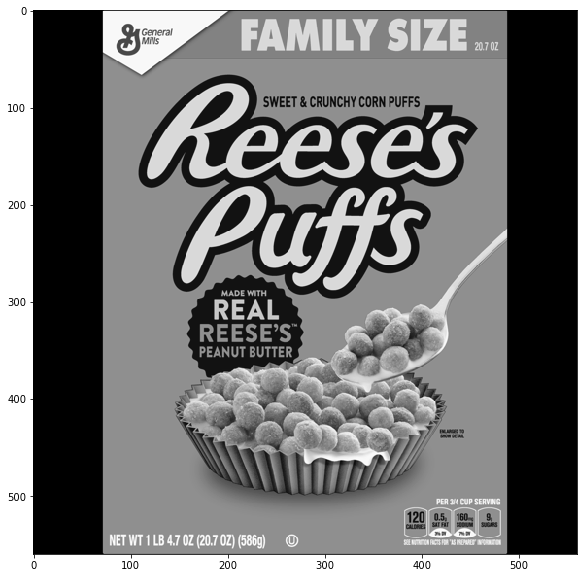

In [6]:
display(reeses)

In [8]:
cereals = cv2.imread('Computer-Vision-with-Python/DATA/many_cereals.jpg',0)

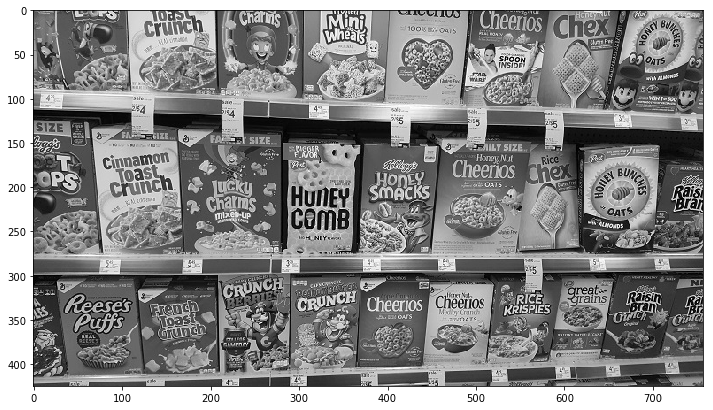

In [9]:
display(cereals)

# Brute-Force Detection with ORB Descriptors

In [10]:
# Create ORB detector object
orb = cv2.ORB_create()

In [11]:
kp1, des1 = orb.detectAndCompute(reeses,None)
kp2, des2 = orb.detectAndCompute(cereals,None)

In [12]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

In [13]:
matches = bf.match(des1,des2)

In [14]:
matches = sorted(matches, key = lambda x:x.distance)

In [15]:
matches

[<DMatch 0000022439DB7210>,
 <DMatch 000002243983BF30>,
 <DMatch 0000022439DB71F0>,
 <DMatch 000002243983BDF0>,
 <DMatch 000002243983BBD0>,
 <DMatch 0000022439DB7CD0>,
 <DMatch 0000022439D750D0>,
 <DMatch 0000022439DB72F0>,
 <DMatch 0000022439DB7C10>,
 <DMatch 0000022439DB70B0>,
 <DMatch 0000022439DB7B70>,
 <DMatch 0000022439DB7D90>,
 <DMatch 000002243983B6B0>,
 <DMatch 0000022439DB7390>,
 <DMatch 0000022439DB7AB0>,
 <DMatch 000002243983B4B0>,
 <DMatch 000002243983B9B0>,
 <DMatch 000002243983BE10>,
 <DMatch 0000022439DB7110>,
 <DMatch 0000022439DB7410>,
 <DMatch 000002243983BE30>,
 <DMatch 0000022439DB7C50>,
 <DMatch 0000022439DB7C70>,
 <DMatch 000002243983BA10>,
 <DMatch 0000022439DB73F0>,
 <DMatch 000002243983B6F0>,
 <DMatch 0000022439DB72D0>,
 <DMatch 0000022439D75050>,
 <DMatch 0000022439D75210>,
 <DMatch 0000022439D75190>,
 <DMatch 000002243983BD50>,
 <DMatch 0000022439DB7230>,
 <DMatch 0000022439DB7570>,
 <DMatch 000002243983B810>,
 <DMatch 0000022439DB7F30>,
 <DMatch 00000224398

In [16]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2, matches[:50],None,flags = 2)

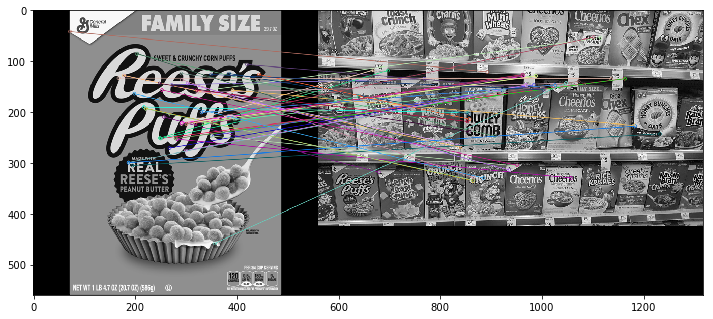

In [17]:
display(reeses_matches)

# This method does not meet our expectations and is not a good method to do feature macthing.